<a href="https://colab.research.google.com/github/aladbukky/Data-Science-Projects-at-SAIL/blob/main/Ebola_Crisis_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("janitor")
install.packages("tidyverse")
library(tidyverse)
library(janitor)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [ ]:
#load the data set
ebola_sierra <- read.csv("/ebola_sierra_leone.csv")
ebola_sierra <- as.data.frame(ebola_sierra)
head(ebola_sierra)# view in tabular form

,id,age,sex,status,date_of_onset,date_of_sample,district
,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,92,6,M,confirmed,2014-06-10,2014-06-15,Kailahun
2,51,46,F,confirmed,2014-05-30,2014-06-04,Kailahun
3,230,NA,M,confirmed,2014-06-26,2014-06-30,Kenema
4,139,25,F,confirmed,2014-06-13,2014-06-18,Kailahun
5,8,8,F,confirmed,2014-05-22,2014-05-27,Kailahun
6,215,49,M,confirmed,2014-06-24,2014-06-29,Kailahun


In [ ]:
dim(ebola_sierra)

[1] 200   7

In [ ]:
glimpse(ebola_sierra)

Rows: 200
Columns: 7
$ id             <int> 92, 51, 230, 139, 8, 215, 189, 115, 218, 159, 119, 248,…
$ age            <dbl> 6, 46, NA, 25, 8, 49, 13, 50, 35, 38, 60, 18, 10, 14, 5…
$ sex            <chr> "M", "F", "M", "F", "F", "M", "F", "M", "F", "F", "F", …
$ status         <chr> "confirmed", "confirmed", "confirmed", "confirmed", "co…
$ date_of_onset  <chr> "2014-06-10", "2014-05-30", "2014-06-26", "2014-06-13",…
$ date_of_sample <chr> "2014-06-15", "2014-06-04", "2014-06-30", "2014-06-18",…
$ district       <chr> "Kailahun", "Kailahun", "Kenema", "Kailahun", "Kailahun…


In [ ]:
summary(ebola_sierra)

       id              age            sex               status         
 Min.   :  1.00   Min.   : 1.80   Length:200         Length:200        
 1st Qu.: 62.75   1st Qu.:20.00   Class :character   Class :character  
 Median :131.50   Median :35.00   Mode  :character   Mode  :character  
 Mean   :136.72   Mean   :33.85                                        
 3rd Qu.:208.25   3rd Qu.:45.00                                        
 Max.   :285.00   Max.   :80.00                                        
                  NA's   :4                                            
 date_of_onset      date_of_sample       district        
 Length:200         Length:200         Length:200        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
                  

In [ ]:
names(ebola_sierra)# get the names of the columns of the data set

[1] "id"             "age"            "sex"            "status"        
[5] "date_of_onset"  "date_of_sample" "district"

In [ ]:
#Cleaning the data set
#Viewing the summary shows that the age column has 4 missing values. It has reveals that the
#date column is not in appropriate format.

#One way to clean the age column is to replace the missing value with the median age of the column,
#wich is usually unaffected by outlier and to preserve the dataset observations, given the NAs is small.
median_age <- median(ebola_sierra$age, na.rm = TRUE)
median_age


[1] 35

In [ ]:
ebola_sierra$age[is.na(ebola_sierra$age)] <- median_age
#confirming if na's have been removed
any(is.na(ebola_sierra$age))
any(is.na(ebola_sierra))


[1] FALSE

[1] FALSE

In [ ]:
#convert the date column from character format to date format

ebola_sierra$date_of_onset <- as.Date(ebola_sierra$date_of_onset, format = "%Y-%m-%d")
ebola_sierra$date_of_sample <- as.Date(ebola_sierra$date_of_sample, format = "%Y-%m-%d")
str(ebola_sierra)


'data.frame':	200 obs. of  7 variables:
 $ id            : int  92 51 230 139 8 215 189 115 218 159 ...
 $ age           : num  6 46 35 25 8 49 13 50 35 38 ...
 $ sex           : chr  "M" "F" "M" "F" ...
 $ status        : chr  "confirmed" "confirmed" "confirmed" "confirmed" ...
 $ date_of_onset : Date, format: "2014-06-10" "2014-05-30" ...
 $ date_of_sample: Date, format: "2014-06-15" "2014-06-04" ...
 $ district      : chr  "Kailahun" "Kailahun" "Kenema" "Kailahun" ...


In [ ]:
#get the minimum and maximum age in the data set from the
ebola_sierra[which.min(ebola_sierra$age),]
ebola_sierra[which.max(ebola_sierra$age),]


,id,age,sex,status,date_of_onset,date_of_sample,district
,<int>,<dbl>,<chr>,<chr>,<date>,<date>,<chr>
107,31,1.8,F,suspected,2014-05-27,2014-06-01,Kailahun


,id,age,sex,status,date_of_onset,date_of_sample,district
,<int>,<dbl>,<chr>,<chr>,<date>,<date>,<chr>
175,82,80,F,confirmed,2014-06-08,2014-06-13,Kailahun


In [ ]:
#get the mean age of the female and male in the data set
mean(ebola_sierra$age[ebola_sierra$sex == "F"])
mean(ebola_sierra$age[ebola_sierra$sex == "M"])


[1] 34.09474

[1] 33.56977

In [ ]:
#get the earliest time date of onset, the earliest date of discovery of the disease symptom and the latest of this data set

#min(ebola_sierra$date_of_onset)
#min(ebola_sierra$date_of_sample)
ebola_sierra[which.min(ebola_sierra$date_of_onset),]
ebola_sierra[which.max(ebola_sierra$date_of_sample),]


,id,age,sex,status,date_of_onset,date_of_sample,district
,<int>,<dbl>,<chr>,<chr>,<date>,<date>,<chr>
177,1,20,F,confirmed,2014-05-18,2014-05-23,Kailahun


,id,age,sex,status,date_of_onset,date_of_sample,district
,<int>,<dbl>,<chr>,<chr>,<date>,<date>,<chr>
54,226,14,F,confirmed,2014-06-25,2014-07-17,Kailahun


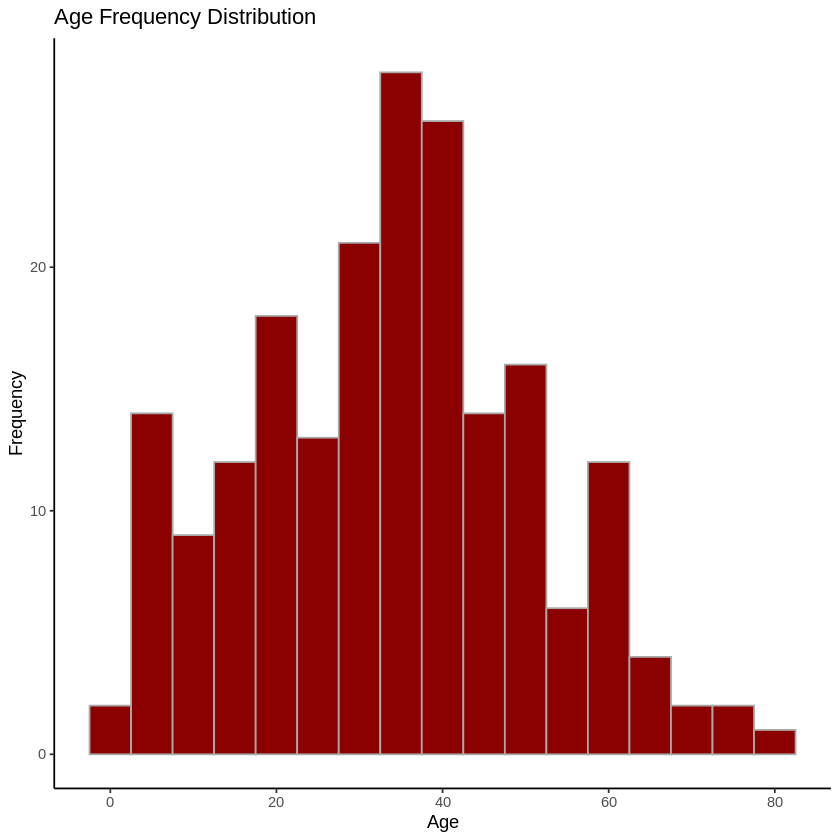

In [ ]:
#plot the age distribution of the data set
age_freq <- ggplot(ebola_sierra, aes(x = age))
age_freq + geom_histogram(binwidth = 5,
                          fill ="red4",
                          colour ="darkgrey")+
  ggtitle("Age Frequency Distribution")+
  theme_classic()+
  labs(x = "Age", y ="Frequency")


In [ ]:
#get the frequency of status by their sex

sex_status_count <- ebola_sierra %>%
  tabyl(sex, status) %>%
  adorn_totals(c("row", "col")) %>%
  adorn_percentages("all") %>%
  adorn_pct_formatting(digits = 1) %>%
  adorn_ns(position = "front")
  sex_status_count


,sex,confirmed,suspected,Total
,<chr>,<chr>,<chr>,<chr>
1,F,102 (51.0%),12 (6.0%),114 (57.0%)
2,M,80 (40.0%),6 (3.0%),86 (43.0%)
3,Total,182 (91.0%),18 (9.0%),200 (100.0%)


In [ ]:
#export the table for report
#write.csv(sex_status_count, "Reports/sex_status_count.csv",
 #         row.names = F)



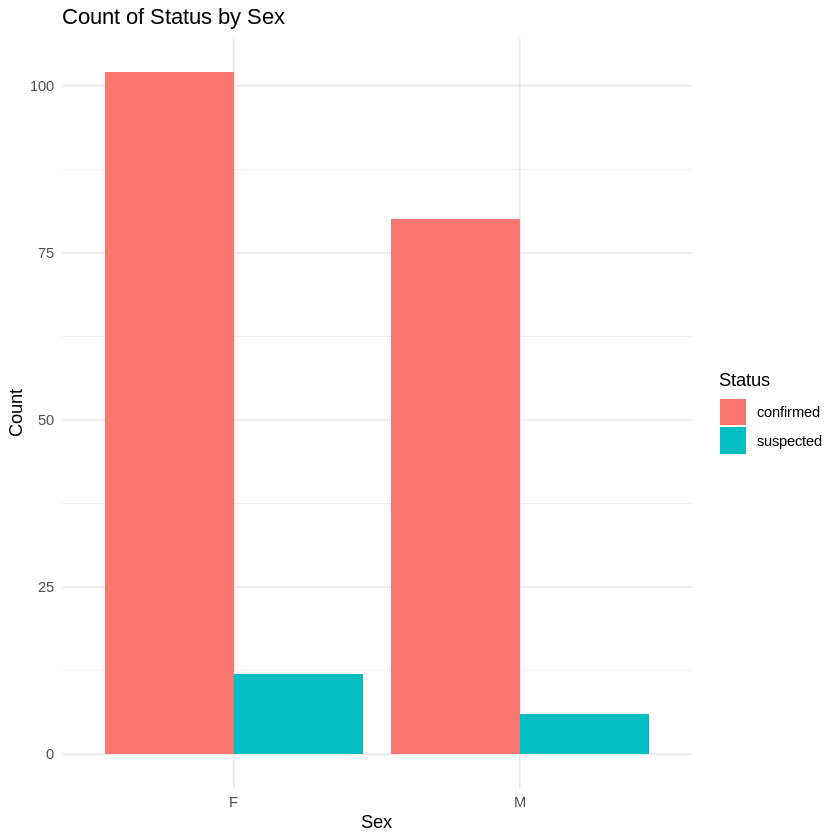

In [ ]:
  #plot graph of the sex by status count
  ggplot(ebola_sierra, aes(x= sex, fill = status)) +
    geom_bar(position = "dodge")+
    labs(title = "Count of Status by Sex", x = "Sex", y = "Count", fill = "Status") +
    theme_minimal()


In [ ]:
#get the district count
district_count <- ebola_sierra %>%
  tabyl(district) %>%
  adorn_pct_formatting(digits = 0) %>%
  arrange(desc(n))
district_count


district,n,percent
<chr>,<dbl>,<chr>
Kailahun,155,78%
Kenema,34,17%
Western Urban,4,2%
Bo,2,1%
Kono,2,1%
Port Loko,2,1%
Kambia,1,0%


In [ ]:
#export the district_count table for report
#write.csv(district_count, "Reports/district_count.csv",
 #         row.names = F)


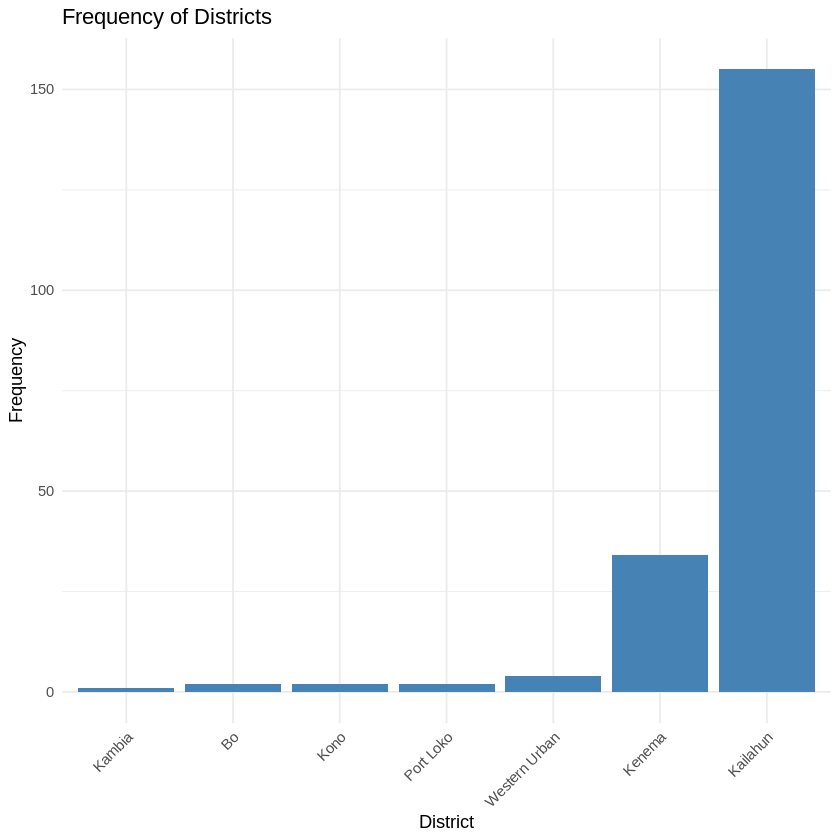

In [ ]:
#plot district count
ggplot(district_count, aes(x = reorder(district, n), y= n)) +
         geom_bar(stat ="identity", fill ="steelblue")+
         labs(title = "Frequency of Districts", x= "District" , y = "Frequency")+
  theme_minimal()+
  theme(axis.text.x = element_text(angle = 45,
                                   hjust = 1))



In [ ]:
#get the district count by status
status_district_count <- ebola_sierra %>%
  tabyl(district, status) %>%
  adorn_totals("row") %>%
  adorn_percentages("all") %>%
  adorn_pct_formatting(digit = 0) %>%
  adorn_ns(position = "front")

  status_district_count


,district,confirmed,suspected
,<chr>,<chr>,<chr>
1,Bo,2 (1%),0 (0%)
2,Kailahun,143 (72%),12 (6%)
3,Kambia,1 (0%),0 (0%)
4,Kenema,32 (16%),2 (1%)
5,Kono,2 (1%),0 (0%)
6,Port Loko,2 (1%),0 (0%)
7,Western Urban,0 (0%),4 (2%)
8,Total,182 (91%),18 (9%)


In [ ]:
  #export the district count by status table for report
#  write.csv(status_district_count, "Reports/status_district_count.csv",
 #           row.names = F)


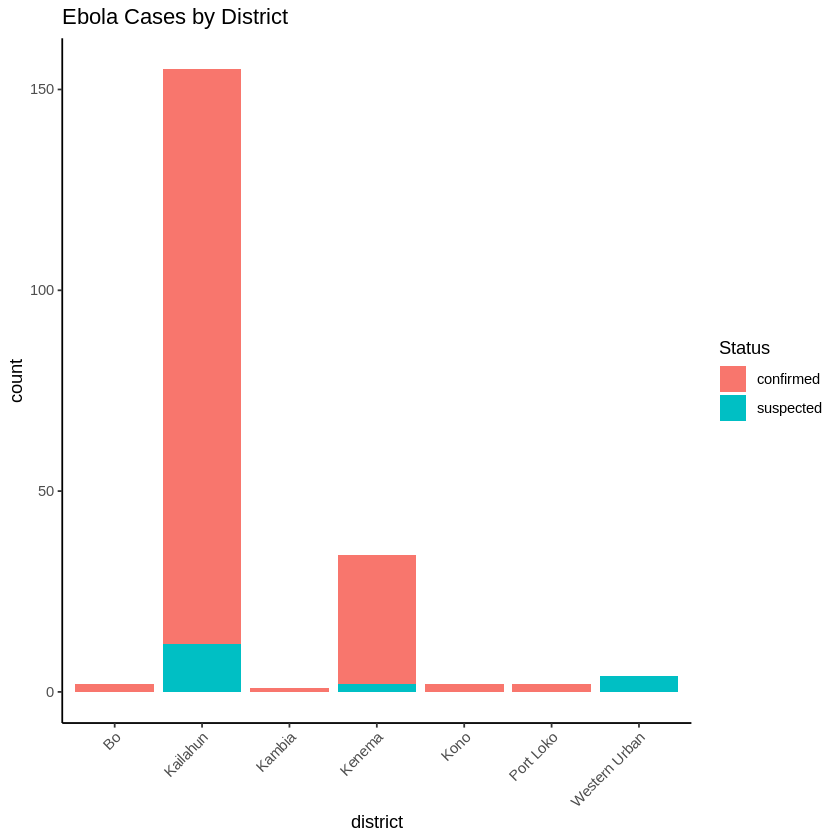

In [ ]:
  # Plot showing the cases by district by status
  ggplot(data = ebola_sierra, aes(x = district, fill = factor(status))) +
    geom_bar() +
    theme_classic() +
    labs(title = "Ebola Cases by District", fill = "Status")+
    theme(axis.text.x = element_text(angle = 45,
                                     hjust = 1))



In [ ]:
  #get the district by status and sex count
  distr.status.sex_count <- ebola_sierra %>%
    tabyl(sex, status, district)
  distr.status.sex_count


sex,confirmed,suspected
<chr>,<dbl>,<dbl>
F,0,0
M,2,0
sex,confirmed,suspected
<chr>,<dbl>,<dbl>
F,82,9
M,61,3
sex,confirmed,suspected
<chr>,<dbl>,<dbl>
F,0,0


In [ ]:
  #convert the list(distr.status.sex_count) to a data frame to combine into one dataframe
  combined_df <- bind_rows(
    lapply(names(distr.status.sex_count), function(district) {
      df <- distr.status.sex_count[[district]]
      df$district <- district
      df
    })
  )
combined_df

sex,confirmed,suspected,district
<chr>,<dbl>,<dbl>,<chr>
F,0,0,Bo
M,2,0,Bo
F,82,9,Kailahun
M,61,3,Kailahun
F,0,0,Kambia
M,1,0,Kambia
F,19,1,Kenema
M,13,1,Kenema
F,0,0,Kono


In [ ]:
# reshape the data into long format
    combined_long_df <- pivot_longer(combined_df, cols = -c(sex, district),
                                   names_to = "status", values_to = "count")
  combined_long_df


sex,district,status,count
<chr>,<chr>,<chr>,<dbl>
F,Bo,confirmed,0
F,Bo,suspected,0
M,Bo,confirmed,2
M,Bo,suspected,0
F,Kailahun,confirmed,82
F,Kailahun,suspected,9
M,Kailahun,confirmed,61
M,Kailahun,suspected,3
F,Kambia,confirmed,0


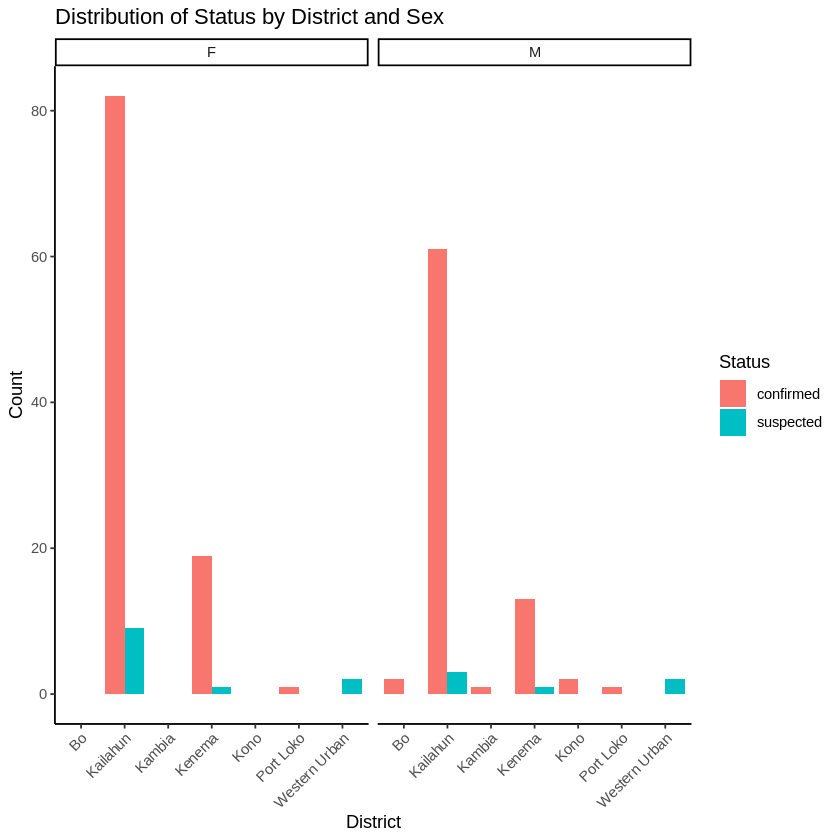

In [ ]:
#plot the graph of district by sex and status

   ggplot(combined_long_df, aes(x = district, y = count, fill = status)) +
    geom_bar(stat = "identity", position = "dodge") +
    facet_wrap(~ sex) +
    labs(title = "Distribution of Status by District and Sex",
         x = "District",
         y = "Count",
         fill = "Status") +
    theme_classic() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))


To see the full report, see the full documentation here [documentation](https://docs.google.com/document/d/16veW9cZ4DXMrgYiF8yJ5S-IxQjnWju4a/edit?usp=sharing&ouid=113427329119267129856&rtpof=true&sd=true)